In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from highlight_text import fig_text
from pyfonts import load_font

In [2]:
cuisines = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-16/cuisines.csv")

In [3]:
# Country level data with mean values
cuisines = cuisines.groupby("country").mean(numeric_only=True)

In [4]:
# Ranking based on avg rating
cuisines["rank"] = cuisines["avg_rating"].rank(ascending=False).astype(int)

In [5]:
# Select first 25 rows
cuisines = cuisines.sort_values(by="rank").reset_index()[:25]

In [6]:
# Select relevant columns
df = cuisines[["country", "calories", "fat", "carbs", "protein", "avg_rating", "rank"]]
df.head(2)

,country,calories,fat,carbs,protein,avg_rating,rank
0,Southern Recipes,487.938776,24.416667,44.469388,23.229167,4.734783,1
1,French,382.600000,23.553846,25.200000,17.015385,4.691935,2


In [7]:
calsans = load_font(
    font_url="https://github.com/google/fonts/blob/main/ofl/calsans/CalSans-Regular.ttf?raw=true"
)

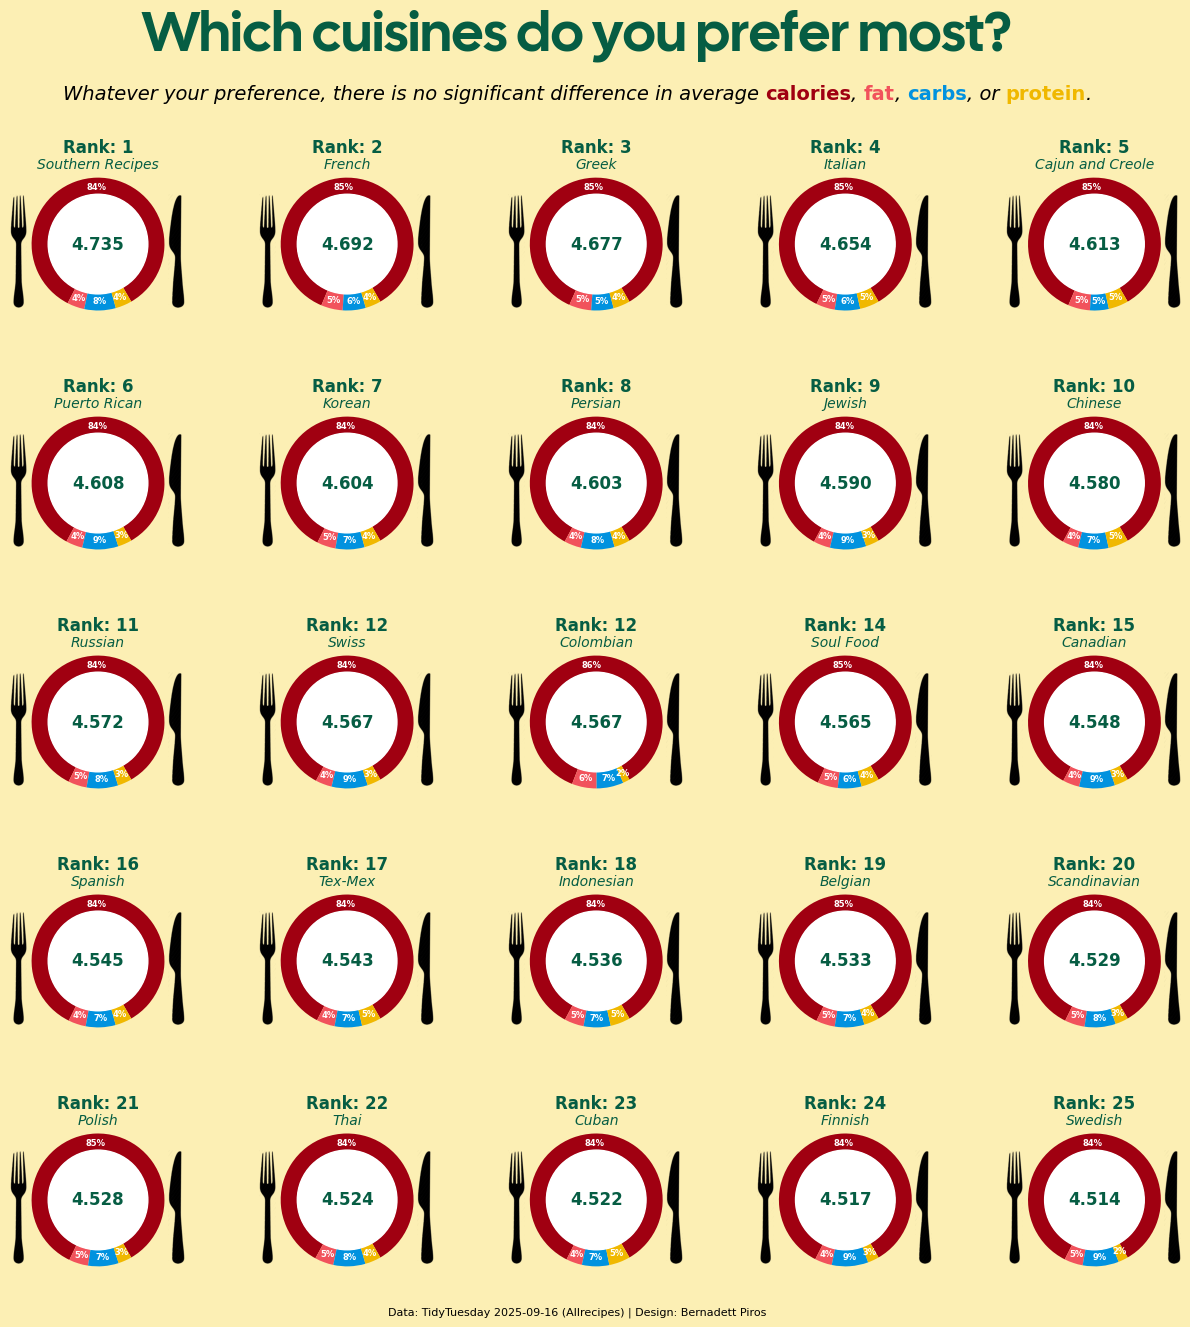

In [10]:
# Load images
img_fork = mpimg.imread("fork.png")  
img_knife = mpimg.imread("knife.png")  

# Figure and axes
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# Color for values
colors = {
    "calories": "#a00011", # darkred
    "fat": "#F1525C",      # pink
    "carbs": "#0192DF",    # blue
    "protein": '#F0B800'   # yellow
}

# Loop over each row and column 
for i, ax in enumerate(axs.flat):
    
    # Row for the current subplot
    row = df.iloc[i]
    
    # Values for the wedges and texts
    values = [row["calories"], row["fat"], row["carbs"], row["protein"]]
    rating=f"{row["avg_rating"]:1.3f}"
    txt = f"{row["country"]}"

    # Subplot rank title   
    subplot_title = f"Rank: {row["rank"]}"
       
    # Donut chart 
    wedges, texts, autotexts = ax.pie(values, autopct="%1.0f%%", pctdistance=0.86, startangle=300,
                                      colors=[colors["calories"], colors["fat"], colors["carbs"], colors["protein"]], 
                                      wedgeprops=dict(width=0.25), textprops={"fontsize":6, "color":"white", "weight":"bold"})
    
    # Add color to the hole in the donut chart
    circle = plt.Circle((0, 0), 0.75, color="white")  
    ax.add_artist(circle)    

    # Add rating title in the center of the donut
    ax.text(0, 0, rating, color="#065D43", ha="center", va="center", fontsize=12, weight="bold")

    # Add cuisine title above the donut
    ax.text(0, 1.2, txt, color="#065D43", ha="center", va="center", style="italic")

    # Add rank title 
    ax.set_title(subplot_title, color="#065D43", fontsize=12, weight="bold")

    # Left inset axis 
    ax_left_inset = ax.inset_axes([-0.03, 0.1, 0.1, 0.7])  
    ax_left_inset.imshow(img_fork)
    ax_left_inset.axis("off")  

    # Right inset axis 
    ax_right_inset = ax.inset_axes([0.92, 0.1, 0.1, 0.7])  
    ax_right_inset.imshow(img_knife)
    ax_right_inset.axis("off")  

    # Equal aspect for the inset axes for the image shape
    ax_left_inset.set_aspect("auto")
    ax_right_inset.set_aspect("auto")

# Horizontal space between columns 
plt.subplots_adjust(wspace=0.5)

# Background color
fig.set_facecolor("#FCEFB4")

# Texts
fig.text(0.5, 0.97, "Which cuisines do you prefer most?", color="#065D43", size=40, font=calsans, ha="center", va="top")

fig_text(0.5, 0.92, "Whatever your preference, there is no significant difference in average <calories>, <fat>, <carbs>, or <protein>.",
         size=14, ha="center", style="italic",
         highlight_textprops=[
            {"color": colors["calories"], "weight": "bold", "style": "normal"},
            {"color": colors["fat"], "weight": "bold", "style": "normal"},
            {"color": colors["carbs"], "weight": "bold", "style": "normal"},
            {"color": colors["protein"], "weight": "bold", "style": "normal"},                       
            ])

fig.text(0.5, 0.1, "Data: TidyTuesday 2025-09-16 (Allrecipes) | Design: Bernadett Piros", size=8, ha="center")

# Show the plot
plt.show()

#fig.savefig("2025-09-16.png", bbox_inches='tight', pad_inches=0.2)